# Vendors Analysis

Analyse duplicates and vendors score

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data_folder = '../data/csv_data/'
extension = '.csv.gz'
build_path = lambda x: data_folder + x + extension

In [3]:
malwr_info = pd.read_csv(build_path('malwr_file_info_filtered'), dtype=str).set_index('link')
malwr_info.start_time = pd.to_datetime(malwr_info.start_time, infer_datetime_format=True)
duplicated_md5s = set(malwr_info[malwr_info.md5.duplicated(keep=False)].md5)

In [131]:
malwr_vendors = pd.read_csv(build_path('malwr_vendors_filtered'), dtype=str).set_index('link')
malwr_vendors = malwr_vendors.join(malwr_info[['md5', 'start_time']], how='inner').sort_values('start_time')

## Analyse duplicates

In [132]:
md5_dups = set(malwr_vendors[malwr_vendors.md5.duplicated()].md5)
malwr_info_duplicated = malwr_info[malwr_info.md5.isin(md5_dups)]
malwr_info_duplicated = pd.concat([malwr_info_duplicated.drop_duplicates(subset='md5', keep='first'),
                        malwr_info_duplicated.drop_duplicates(subset='md5', keep='last')])
classifications = malwr_vendors[malwr_vendors.index.isin(malwr_info_duplicated.index)].replace(
    'Clean', np.NaN).groupby(['md5', 'start_time']).count().sum(axis=1).reset_index('start_time')
differences = classifications.groupby(['md5']).diff().dropna().astype('int')
frequency = differences[0].value_counts().sort_index()
temp = [i for i in range(-38, 39) if i not in frequency.index]
for i in temp:
    frequency[i] = 0
ratio = frequency.divide(len(differences))

In [140]:
ratio.sort_index()

-38    0.000000
-37    0.000000
-36    0.000000
-35    0.000000
-34    0.000000
-33    0.000000
-32    0.000037
-31    0.000000
-30    0.000000
-29    0.000000
-28    0.000000
-27    0.000000
-26    0.000000
-25    0.000000
-24    0.000000
-23    0.000000
-22    0.000000
-21    0.000000
-20    0.000037
-19    0.000000
-18    0.000037
-17    0.000000
-16    0.000037
-15    0.000000
-14    0.000000
-13    0.000037
-12    0.000074
-11    0.000148
-10    0.000037
-9     0.000259
         ...   
 9     0.010193
 10    0.010636
 11    0.009861
 12    0.009159
 13    0.008494
 14    0.007830
 15    0.007866
 16    0.006795
 17    0.006241
 18    0.006094
 19    0.006795
 20    0.005872
 21    0.005503
 22    0.005392
 23    0.005466
 24    0.005281
 25    0.005207
 26    0.005429
 27    0.005687
 28    0.005134
 29    0.005060
 30    0.004727
 31    0.005244
 32    0.003028
 33    0.003139
 34    0.002548
 35    0.001477
 36    0.000923
 37    0.000148
 38    0.000000
Name: 0, Length: 77, dty

In [134]:
display('Changes: {:.2f}%'.format(100*ratio[ratio.index != 0].sum()))
display('Positive changes: {:.2f}%'.format(100*ratio[ratio.index > 0].sum()))
display('Negative changes: {:.2f}%'.format(100*ratio[ratio.index < 0].sum()))
display('Decrease in 5+: {:.2f}%'.format(100*ratio[(ratio.index) <= -5 ].sum()))

'Changes: 44.32%'

'Positive changes: 38.72%'

'Negative changes: 5.61%'

'Decrease in 5+: 0.45%'

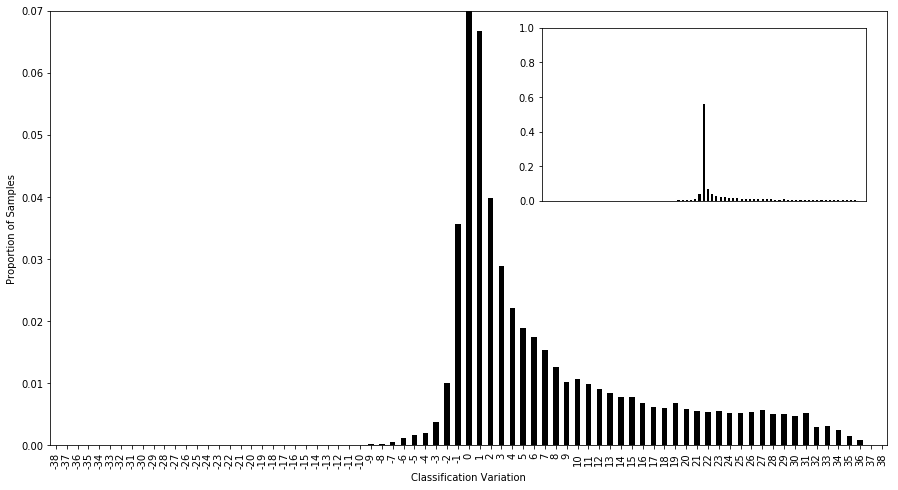

In [144]:
ax = ratio.sort_index().plot.bar(
    figsize=((15, 8)), #title='Distribution of changes',
    ylim=(0, 0.07), color='black')
ax.set_xlabel('Classification Variation')
ax.set_ylabel('Proportion of Samples')

a = plt.axes([0.58, .55, .3, .3])
ratio.sort_index().plot.bar(color='black')
plt.xticks([])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.show()

In [126]:
#%%time
# Calculate the difference between last and first submission
differences = []
# Calculate the difference between last and first submission for clean samples
clean_differences = []
# Calculate the difference between last and first submission for malware samples
malware_differences = []

for md5 in scored.index.unique():
    temp = scored[scored.index == md5].sort_values('start_time')
    temp = temp['scores'].values
    if len(temp) < 2:
        continue
    differences += [temp[-1] - temp[0]]
    if temp[0] == 0:
        clean_differences += [temp[-1]]
    #if temp[-1] == 0 and temp[0] >= 0:
    if temp[0] > 0:
        malware_differences += [temp[-1] - temp[0]]

In [ ]:
classifications = malwr_useful.replace('Clean', np.NaN).groupby(['md5', 'start_time']).count().sum(axis=1).reset_index('start_time')
differences = classifications.groupby(['md5']).diff().dropna().astype('int')
frequency = differences[0].value_counts().sort_index()

In [129]:
malware_differences

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 19.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 21.0,
 2.0,
 0.0,
 0.0,
 1.0,
 -2.0,
 0.0,
 0.0,
 21.0,
 0.0,
 -1.0,
 0.0,
 21.0,
 -1.0,
 4.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 10.0,
 0.0,
 13.0,
 4.0,
 0.0,
 12.0,
 0.0,
 0.0,
 32.0,
 2.0,
 31.0,
 0.0,
 0.0,
 0.0,
 4.0,
 2.0,
 9.0,
 0.0,
 9.0,
 6.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 21.0,
 28.0,
 11.0,
 11.0,
 4.0,
 16.0,
 7.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 0.0,
 24.0,
 -1.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 11.0,
 2.0,
 26.0,
 0.0,
 0.0,
 5.0,
 2.0,
 23.0,
 3.0,
 0.0,
 31.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 3.0,
 28.0,
 7.0,
 9.0,
 1.0,
 0.0,
 0.0,
 28.0,
 0.0,
 27.0,
 0.0,
 0.0,
 0.0,
 0.0,
 30.0,
 1.0,
 0.0,
 27.0,
 0.0,
 8.0,
 1.0,
 0.0,
 -4.0,
 9.0,
 0.0,
 22.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 29.0,
 0.0,
 14.0,
 0.0,
 14.0,
 14.0,
 3.0,
 1.0,
 6.0,
 14.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 9.0,
 2.0,
 2

In [91]:
scores = malwr_vendors.replace('Clean', np.NaN).count(axis=1).astype(int)
md5_dups = set(malwr_info[(malwr_info.md5.duplicated()) & (malwr_info.index.isin(scores.index)) ].md5)
# Filter duplicates only
duplicates = malwr_info[malwr_info.md5.isin(md5_dups)][['md5', 'start_time']]
duplicates = pd.concat([duplicates.drop_duplicates(subset='md5', keep='first'),
                        duplicates.drop_duplicates(subset='md5', keep='last')])
duplicates.loc[:, 'count'] = scores
duplicates.dropna(inplace=True)
duplicates = duplicates.groupby(['md5', 'start_time']).sum().reset_index('start_time')

In [97]:
%%time
# Calculate the difference between last and first submission
differences = []
# Calculate the difference between last and first submission for clean samples
clean_differences = []
# Calculate the difference between last and first submission for malware samples
malware_differences = []

for md5 in duplicates.index.unique():
    temp = duplicates[duplicates.index == md5].sort_values('start_time', ascending=False)
    temp = temp['count'].values
    if len(temp) != 2:
        continue
    differences += [temp[0] - temp[1]]
    if temp[1] == 0:
        clean_differences += [temp[0] - temp[1]]
    if temp[0] == 0 and temp[1] >= 0:
        malware_differences += [temp[0] - temp[1]]

CPU times: user 3min 12s, sys: 231 ms, total: 3min 12s
Wall time: 3min 12s


In [135]:
for i in range(-(len(malwr_vendors.columns)), len(malwr_vendors.columns)+1):

SyntaxError: unexpected EOF while parsing (<ipython-input-135-a1a353219eac>, line 1)

In [141]:
differences_count = pd.Series(differences).value_counts().sort_index()
differences_ratio = differences_count.divide(differences_count.sum())
#differences_ratio.index = differences_ratio.index.astype(str)
temp = [i for i in range(-(len(malwr_vendors.columns)-1), len(malwr_vendors.columns)+1)]
temp = [i for i in temp if i not in differences_ratio.index]
display(differences_ratio.index.astype(str))
for i in temp:
    differences_ratio.iloc[i] = 0
#differences_ratio.sort_index(inplace=True)
display(differences_ratio)

TypeError: Setting <class 'pandas.core.indexes.numeric.Float64Index'> dtype to anything other than float64 or object is not supported

In [109]:


clean_differences_count = pd.Series(clean_differences).value_counts().sort_index()
clean_differences_ratio = pd.Series(clean_differences).value_counts().divide(len(clean_differences)).sort_index()
temp = [i for i in range(0, len(malwr_vendors.columns)-1)]
temp = [i for i in temp if i not in clean_differences_ratio.index]
for i in temp:
    clean_differences_ratio[i] = 0
clean_differences_ratio.sort_index(inplace=True)
display(clean_differences_ratio)

malware_differences_ratio = pd.Series(malware_differences).value_counts().divide(len(malware_differences)).sort_index()
temp = [i for i in range(-(len(malwr_vendors.columns)), 0)]
temp = [i for i in temp if i not in malware_differences_ratio.index]
for i in temp:
    malware_differences_ratio[i] = 0
malware_differences_ratio.sort_index(inplace=True)

-32.0    0.000037
-20.0    0.000037
-18.0    0.000037
-16.0    0.000037
-13.0    0.000037
-12.0    0.000074
-11.0    0.000148
-10.0    0.000037
-9.0     0.000259
-8.0     0.000296
-7.0     0.000630
-6.0     0.001260
-5.0     0.001667
-4.0     0.002112
-3.0     0.003891
-2.0     0.010264
-1.0     0.035534
 0.0     0.555506
 1.0     0.000000
 2.0     0.000000
 3.0     0.000000
 4.0     0.000000
 5.0     0.000000
 6.0     0.017341
 7.0     0.000000
 8.0     0.000000
 9.0     0.000000
 10.0    0.000000
 11.0    0.000000
 12.0    0.000000
 13.0    0.000000
 14.0    0.000000
 15.0    0.000000
 16.0    0.000000
 17.0    0.000000
 18.0    0.006336
 19.0    0.000000
 20.0    0.005966
 21.0    0.000000
 22.0    0.005336
 23.0    0.000000
 24.0    0.000000
 25.0    0.005039
 26.0    0.005336
 27.0    0.005706
 28.0    0.004928
 29.0    0.005150
 30.0    0.004928
 31.0    0.005113
 32.0    0.003112
 33.0    0.003187
 34.0    0.002520
 35.0    0.001593
 36.0    0.001075
 37.0    0.000148
dtype: flo

0.0     0.765989
1.0     0.080474
2.0     0.024566
3.0     0.008683
4.0     0.007200
5.0     0.005294
6.0     0.004447
7.0     0.004871
8.0     0.003600
9.0     0.003177
10.0    0.003388
11.0    0.003812
12.0    0.001482
13.0    0.002753
14.0    0.002965
15.0    0.003177
16.0    0.004024
17.0    0.002118
18.0    0.002753
19.0    0.001906
20.0    0.004447
21.0    0.002118
22.0    0.002330
23.0    0.002965
24.0    0.002753
25.0    0.003600
26.0    0.004024
27.0    0.004235
28.0    0.003600
29.0    0.005294
30.0    0.002541
31.0    0.004447
32.0    0.003600
33.0    0.004871
34.0    0.005294
35.0    0.002753
36.0    0.003812
37.0    0.000635
dtype: float64

IndexError: index -38 is out of bounds for axis 0 with size 12

In [ ]:
%%time
# Get DR FPR based on vendors' own changes
duplicates = reports_vendors[reports_vendors.md5.isin(md5_dups)]
duplicates = pd.concat([duplicates.drop_duplicates(subset='md5', keep='first'),
                        duplicates.drop_duplicates(subset='md5', keep='last')])
duplicates = duplicates.replace('Clean', np.NaN)
duplicates = duplicates.astype('str')
vendors = dict()
for v in duplicates.columns[2:]:
#                 FN FP TN TP
    vendors[v] = [0, 0, 0, 0]

for md5 in md5_dups:
    temp = duplicates[duplicates.md5 == md5].sort_values('date')
    for v in temp.columns[2:]:
        # False negative
        if temp[v][0] == 'nan' and temp[v][1] != 'nan':
            vendors[v][0] += 1
            continue
        # False positive
        if temp[v][0] != 'nan' and temp[v][1] == 'nan':
            vendors[v][1] += 1
            continue
        if temp[v][0] == temp[v][1]:
            # True Negative
            if temp[v][0] == 'nan':
                vendors[v][2] += 1
            # True Positive
            else:
                vendors[v][3] += 1